In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('User_Data.csv')

In [3]:
encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])
        encoders[col] = encoder

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=62)

def euclidean_dist(x, y):
    return np.linalg.norm(x - y)

In [6]:
def knn_classifier(train_data, train_labels, test_data, k):
    results = []
    for test_point in test_data:
        dist_list = [euclidean_dist(test_point, train_point) for train_point in train_data]
        k_closest = np.argsort(dist_list)[:k]
        k_labels = [train_labels[i] for i in k_closest]
        majority_label = Counter(k_labels).most_common(1)[0][0]
        results.append(majority_label)
    return results

In [7]:
def evaluate_knn(k_values):
    accuracies = []
    for k in k_values:
        predictions = knn_classifier(X_train, y_train, X_test, k)
        score = accuracy_score(y_test, predictions)
        accuracies.append(score)
        print(f"For K={k}, Accuracy={score * 100:.2f}%")
    return accuracies

k_range = range(1, 21)
accuracy_scores = evaluate_knn(k_range)

For K=1, Accuracy=75.00%
For K=2, Accuracy=75.00%
For K=3, Accuracy=82.50%
For K=4, Accuracy=75.00%
For K=5, Accuracy=85.00%
For K=6, Accuracy=85.00%
For K=7, Accuracy=82.50%
For K=8, Accuracy=85.00%
For K=9, Accuracy=82.50%
For K=10, Accuracy=80.00%
For K=11, Accuracy=80.00%
For K=12, Accuracy=80.00%
For K=13, Accuracy=80.00%
For K=14, Accuracy=80.00%
For K=15, Accuracy=82.50%
For K=16, Accuracy=80.00%
For K=17, Accuracy=80.00%
For K=18, Accuracy=80.00%
For K=19, Accuracy=80.00%
For K=20, Accuracy=80.00%


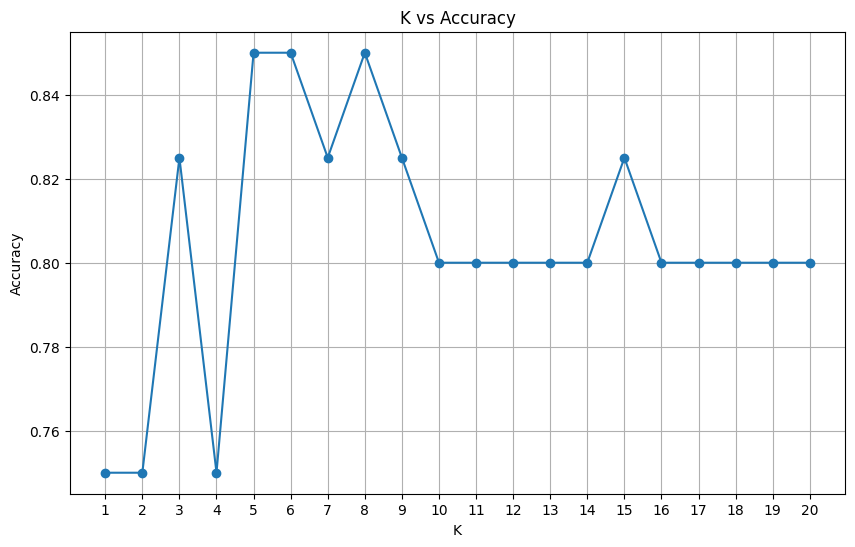

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [9]:
best_k = k_range[np.argmax(accuracy_scores)]
optimal_predictions = knn_classifier(X_train, y_train, X_test, best_k)
conf_matrix = confusion_matrix(y_test, optimal_predictions)
optimal_accuracy = accuracy_score(y_test, optimal_predictions)
conf_matrix, optimal_accuracy, best_k

(array([[26,  1],
        [ 5,  8]]),
 0.85,
 5)